241
241


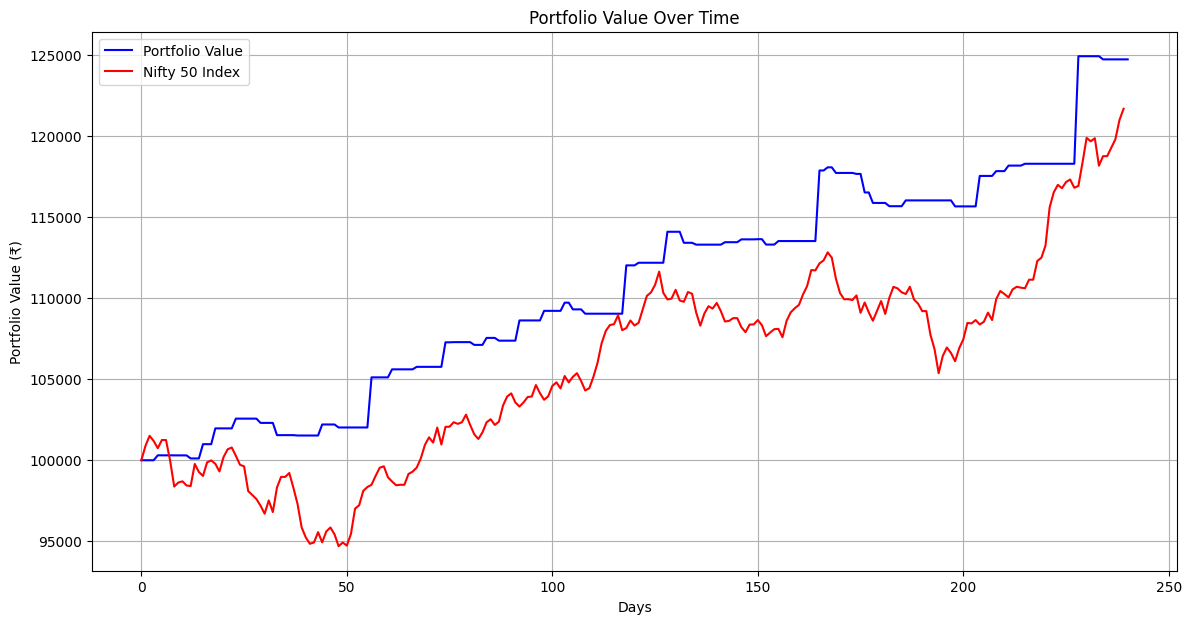

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('predictions.csv')


actual_prices = data['Actual Prices'].values
predicted_prices = data['Predicted Prices'].values
print(len(actual_prices))
print(len(predicted_prices))

initial_investment = 100000  # 1 lakh rupees
have_trade = False
portfolio_value = initial_investment
portfolio_values = [portfolio_value]  # Store portfolio values for plotting

# Initialize trading journal
trading_journal = []

# Iterate over each day's prices
for i in range(len(actual_prices)-1):
    actual_price = actual_prices[i]
    predicted_price = predicted_prices[i+1]
    x=predicted_prices[i]
    if not have_trade and predicted_price > x:#actual_price:
        # Generate buy trade
        have_trade = True
        buy_price = actual_price
        trading_journal.append((i, 'Buy', actual_price))
    elif have_trade and predicted_price < x:#actual_price:
        # Generate sell trade
        have_trade = False
        sell_price = actual_price
        # Calculate profit/loss
        profit_loss = (sell_price - buy_price) * (portfolio_value / buy_price)
        portfolio_value += profit_loss
        trading_journal.append((i, 'Sell', actual_price))
    elif have_trade and predicted_price > x:#actual_price:
        # Hold the trade
        pass
    portfolio_values.append(portfolio_value)  # No trade, portfolio value remains same



# Calculate daily returns from the closing prices
nifty_returns = np.diff(actual_prices) / actual_prices[:-1]

initial_nifty_value = 100000
nifty_values = [initial_investment] # Initial investment of 1 lakh rupees

# Simulate investment in Nifty 50 index
for i in range(1, len(nifty_returns)):
    nifty_value = nifty_values[-1] * (1 + nifty_returns[i - 1])
    nifty_values.append(nifty_value)
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(range(len(portfolio_values)), portfolio_values, label='Portfolio Value', color='blue')
plt.plot(range(len(nifty_values)), nifty_values, label='Nifty 50 Index', color='red')
plt.xlabel('Days')
plt.ylabel('Portfolio Value (₹)')
plt.title('Portfolio Value Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# Print the trading journal
print("Trading Journal:")
print("Day\tAction\tPrice")
for entry in trading_journal:
    day, action, price = entry
    print(f"{day}\t{action}\t{price}")

Trading Journal:
Day	Action	Price
1	Buy	18053.0
3	Sell	18108.000000000004
5	Buy	18119.0
6	Sell	18118.0
9	Buy	17649.000000000004
11	Sell	17616.0
12	Buy	17610.0
14	Sell	17765.0
15	Buy	17722.0
17	Sell	17893.000000000004
20	Buy	17930.0
22	Sell	18036.0
27	Buy	17511.0
28	Sell	17466.000000000004
31	Buy	17451.000000000004
32	Sell	17322.0
33	Buy	17594.0
37	Sell	17590.0
42	Buy	16986.0
43	Sell	17100.000000000004
45	Buy	17108.0
47	Sell	17077.0
51	Buy	17081.0
55	Sell	17599.0
56	Buy	17624.0
60	Sell	17707.0
63	Buy	17624.0
64	Sell	17624.0
65	Buy	17743.0
66	Sell	17769.0
67	Buy	17814.0
73	Sell	18069.0
74	Buy	18264.0
75	Sell	18266.0
76	Buy	18315.0
80	Sell	18286.0
82	Buy	18130.0
83	Sell	18203.0
84	Buy	18314.0
86	Sell	18285.0
87	Buy	18321.0
91	Sell	18534.0
93	Buy	18534.0
97	Sell	18635.0
99	Buy	18602.0
102	Sell	18688.0
103	Buy	18826.0
104	Sell	18755.0
105	Buy	18817.000000000004
107	Sell	18771.0
110	Buy	18817.000000000004
117	Sell	19332.0
118	Buy	19356.0
120	Sell	19384.0
121	Buy	19414.000000000004
127	Sell	1

In [ ]:
#profit generated
print(portfolio_values[-1])
print(nifty_values[-1])

124752.23727096792
121704.38670019554


In [ ]:
# a function to calculate maximum drawdown percentage
def calculate_max_drawdown(returns):
    peak_value = returns[0]
    max_drawdown = 0

    for value in returns:
        if value > peak_value:
            peak_value = value
        else:
            drawdown = (peak_value - value) / peak_value * 100
            if drawdown > max_drawdown:
                max_drawdown = drawdown

    return max_drawdown

# Calculate maximum drawdown percentage for portfolio and Nifty 50 index
portfolio_max_drawdown = calculate_max_drawdown(portfolio_values)
nifty_max_drawdown = calculate_max_drawdown(nifty_values)

# Print the results
print("Portfolio Maximum Drawdown: {:.2f}%".format(portfolio_max_drawdown))
print("Nifty 50 Index Maximum Drawdown: {:.2f}%".format(nifty_max_drawdown))


Portfolio Maximum Drawdown: 2.04%
Nifty 50 Index Maximum Drawdown: 6.72%


In [ ]:
# a function to calculate Sharpe ratio
def calculate_sharpe_ratio(returns, risk_free_rate):
    excess_returns = returns - risk_free_rate
    mean_excess_return = np.mean(excess_returns)
    std_excess_return = np.std(returns)

    # Calculate Sharpe ratio
    sharpe_ratio = mean_excess_return / std_excess_return

    return sharpe_ratio

# the risk-free rate (annualized)
risk_free_rate = 0.07/252

# Calculate daily returns for portfolio and Nifty 50 index
portfolio_returns = np.diff(portfolio_values) / portfolio_values[:-1]
nifty_returns = np.diff(nifty_values) / nifty_values[:-1]

# Calculate Sharpe ratio for portfolio and Nifty 50 index
portfolio_sharpe_ratio = calculate_sharpe_ratio(portfolio_returns, risk_free_rate)
nifty_sharpe_ratio = calculate_sharpe_ratio(nifty_returns, risk_free_rate)

# Print the results
print("Portfolio Sharpe Ratio: {:.4f}".format(portfolio_sharpe_ratio))
print("Nifty 50 Index Sharpe Ratio: {:.4f}".format(nifty_sharpe_ratio))



Portfolio Sharpe Ratio: 0.1168
Nifty 50 Index Sharpe Ratio: 0.0927
